In [1]:
import jsonlines as jsonl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

In [2]:
file = "datasets/labeled_datasets/labeled_dataset_1683538348.jsonl"
dataset = {}
with jsonl.open(file) as reader:
    for line in reader:
        dataset.update(line)

In [7]:
print(f"top level keys: {dataset.keys()}")
print(f"properties: {dataset['props'].keys()}")
idx = 0
print(f"dataset size: {len(dataset['dataset'])}")
print(f"dataset: {dataset['dataset'][idx].keys()}")

top level keys: dict_keys(['props', 'dataset'])
properties: dict_keys(['frame_count', 'fps', 'frames_saved', 'width', 'height'])
dataset size: 12
dataset: dict_keys(['file_name', 'data', 'kp', 'label', 'target'])


In [4]:
# -- data
idx = 2
print("filename:", dataset['dataset'][idx]['file_name'])
data = np.array(dataset['dataset'][idx]['data'])
print("data shape: ", data.shape)
keypoints = np.array(dataset['dataset'][idx]['kp'])
print("keypoints shape: ", keypoints.shape)
print("label:", dataset['dataset'][idx]['label'])

filename: pose_1682066773.avi
data shape:  (20, 360, 640, 3)
keypoints shape:  (20, 1, 1, 17, 3)
label: waving


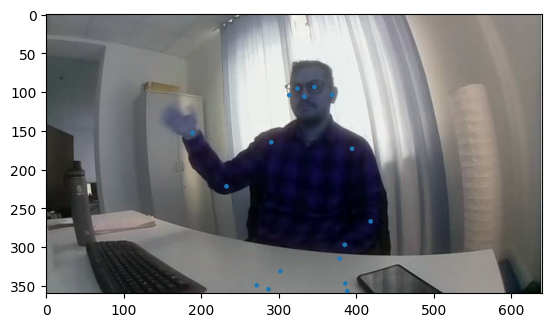

In [5]:
frame = 15 # the frame to plot
# Create a figure. Equal aspect so circles look circular
fig,ax = plt.subplots(1)
ax.set_aspect('equal')
ax.imshow(data[frame])
# -- draw keypoints
kp = keypoints.squeeze() # -- append to function
for k in range(17):
    circ = Circle((kp[frame][k][1],kp[frame][k][0]),3)
    ax.add_patch(circ)
    


## 